# Minimal example of esn library use

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from echo import esn

In [64]:
def niceplot(y, z, title):
    plt.figure(figsize=(12,3));
    plt.plot(np.array([y, z]).T);
    plt.legend(labels=['Original', 'Prediction']);
    plt.title(title);

Original rho: 2.6565709648256473
Testing loss: 29.413094050817985
Testing loss: 42.19427380213822


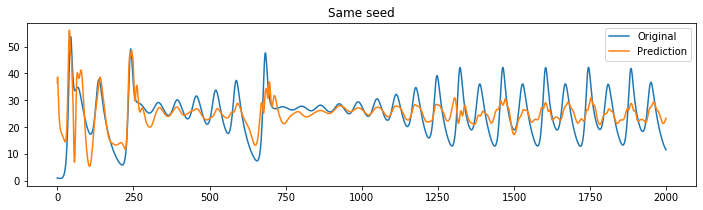

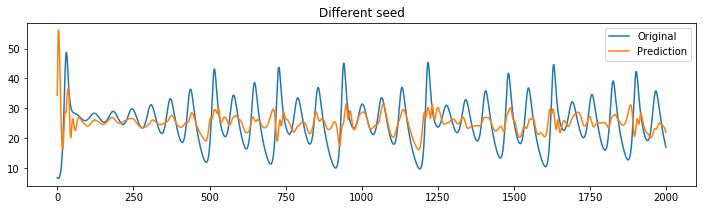

In [96]:
Data = esn.Data
Reservoir = esn.Reservoir

data = Data.create_source('lorenz')
x,y = data.generate(10000, seed=1)
model = Reservoir(100)
#model = Reservoir(100, l2=0)
print('Original rho:', model.meta['original_rho'])
model.fit(x, y, skip=200)

x,y = data.generate(2000, seed=1) # Same seed
z = model.predict(x)
loss = esn.utils.loss(y[200:], z[200:])
print('Testing loss:', loss)  
niceplot(y, z, 'Same seed')

x,y = data.generate(2000, seed=[0, 7, 7]) # Different seed!
z = model.predict(x)
loss = esn.utils.loss(y[200:], z[200:])
print('Testing loss:', loss)
niceplot(y, z, 'Different seed')

In [3]:
print(esn.utils.loss(y[200:], z[200:]))
m = np.mean(z[200:])
print(esn.utils.loss(y[200:], (z[200:]-m)*1.3+m))

1.8838010910194263
6.466675717741327
